                                           /!\ - Important /!\
    - Lorsque il est demandé de compéter un code : les lignes à compléter sont indiqués par "TODO" 
    - Lorsque une question implique une réponse rédigée vous pouvez écrire directement dans la cellule correspondante. 
    - Télécharger les fichiers contenant les données et les placer dans le même répertoire que le fichier .ipynb
    - A la fin de la séance déposez votre travail sur la page e-campus du cours en un seul fichier nommé : nom.ipynb 

    

"""
Le problème à résoudre : sa modélisation et son étude théorique

Le but de ce premier exercice est de se familiariser avec un logiciel d'optimisation pour résoudre un problème
d’optimisation avec contraintes. Vu le temps imparti, on considérera le petit exemple qui suit, même
si ce problème peut se résoudre graphiquement (comme on le verra à la fin), vu sa petite dimension
(2 variables de décision).

L'entreprise Swisscom voudrait installer une antenne pour connecter quatre nouveaux clients importants à son réseau. 
Cette antenne doit se trouver le plus près possible de chaque client, en donnant la priorité aux meilleurs d’entre eux. 
Cependant afin d’éviter les proliférations d’antennes de télécommunication, il lui est interdit d’installer cette nouvelle antenne 
à une distance inférieure à 10 km des deux autres, situées respectivement aux coordonnées (-5,10) et (5,0). 
Les coordonnées sont exprimées en kilomètres à partir du siège de Swisscom. Pour chaque client, Swisscom connaît sa situation géographique, 
ainsi que le nombre d’heures de communications que le client compte utiliser par mois.

Pour simplifier le problème on supposera que Swisscom cherche à installer l’antenne à un endroit
qui minimisera la fonction-objectif suivante : la somme des éloignements de chaque client, en
pondérant chacun des ces éloignements proportionnellement au nombre mensuel d’heures que le client compte utiliser. 
L'éloignement d’un client est défini comme étant le carré de la distance du client à la nouvelle antenne. 
On a ainsi une fonction-objectif différentiable. On considère avoir à notre disposition deux fichiers :
- clients.txt qui contient un tableau où la $i$ ième ligne contient les coordonnées géographiques $(x_i^c,y_i^c)$ (colonnes 1 et 2) 
  et le nombre d’heures $h_i^c$ de communication (colonne 3) du $i$ ième client
- antennes.txt qui contient un tableau où la $i$ ième ligne contient les coordonnées géographiques $(x_i^a,y_i^a)$ (colonnes 1 et 2) 
  de la $i$ ième ancienne antenne, suivi (colonne 3) de la distance minimale $d_i^a$ autorisée à cette $i$ ième ancienne antenne.

Nous avons vu dans un exercice analogue que le problème se formule comme :

\begin{array}{lll}\tag{$P$}
\min         & f(x,y):=\frac{1}{\sum_{i =1}^{nb_{clients}}h_i^c}\displaystyle\sum_{i =1}^{nb_{clients}} h^c_i  \left((x-x^c_i)^2+(y-y^c_i)^2\right) &\\
{s.c.}  & g_i(x,y):=(d_i^a)^2 -  (x-x_i^a)^2-(y-y_i^a)^2\leq 0, \qquad \forall i =1\dots, nb_{antennes} &\\\ 
\end{array}
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
clients = np.genfromtxt('clients.txt')
cx = clients[:,0]
cy = clients[:,1]
ch = clients[:,2]
antennes = np.genfromtxt('antennes.txt')
ax = antennes[:,0]
ay = antennes[:,1]
ad = antennes[:,2]
        

"A la main" :
- Vérifier que la fonction-objectif $f$ est strictement convexe.
- Vérifier que la fonction-objectif est coercive.
- Montrer que le problème admet au moins un minimum global

Définissons toutes les fonctions qui  interviennent dans le problème d'optimisation ainsi que leur gradient. 

In [3]:
def distSq(x,y):
    '''carre distance euclidienne pour calculer l'éloignement '''
    return  ((x[0]-y[0])**2+(x[1]-y[1])**2)

def fobj(x):
    return (1/np.sum(ch))*sum(np.array([bh*distSq(x, np.array([bx,by])) for [bx,by,bh] in  clients]))



def gradFobj(x):     
    return (2/np.sum(ch))*np.array([ sum(ch*(x[0]-cx)), sum(ch*(x[1]-cy)) ])

def g(x,i):
    return  ad[i]**2 -distSq(x, np.array([ax[i], ay[i]])) 


def gradG(x, i):
    return -np.array([2*(x[0]-ax[i]), 2*(x[1]- ay[i])])



et pour visualiser les choses on définit cette fonction

In [4]:
def display():
    plt.figure(figsize = (12,12))
    ''' Affichage des clients, des antennes, des contraintes et     des lignes de niveaux de la fonction objective'''
    plt.plot(cx,cy, '*', label = 'Clients')
    plt.plot(ax,ay,'.', label = 'Anciennes antennes')
    x, y = np.meshgrid(np.linspace(-22,22,401), np.linspace(-22,22,401))
    #ligne de niveau de la fct-obj
    z = fobj([x,y])
    level = np.linspace(0, 3000, 35)
    #level = np.concatenate((level, np.array([ self.objfun(sol_sousc)])),
    #                       axis =1)
    lignes_niv = plt.contour(x,y,z,level)
    plt.clabel(lignes_niv, inline=1, fontsize=7)
        
     #ligne g_i(x)=0 : limite des contraintes
    for j in range(0,len(ax)):
        plt.contour(x,y,g([x,y],j), np.array([0]),colors='red')


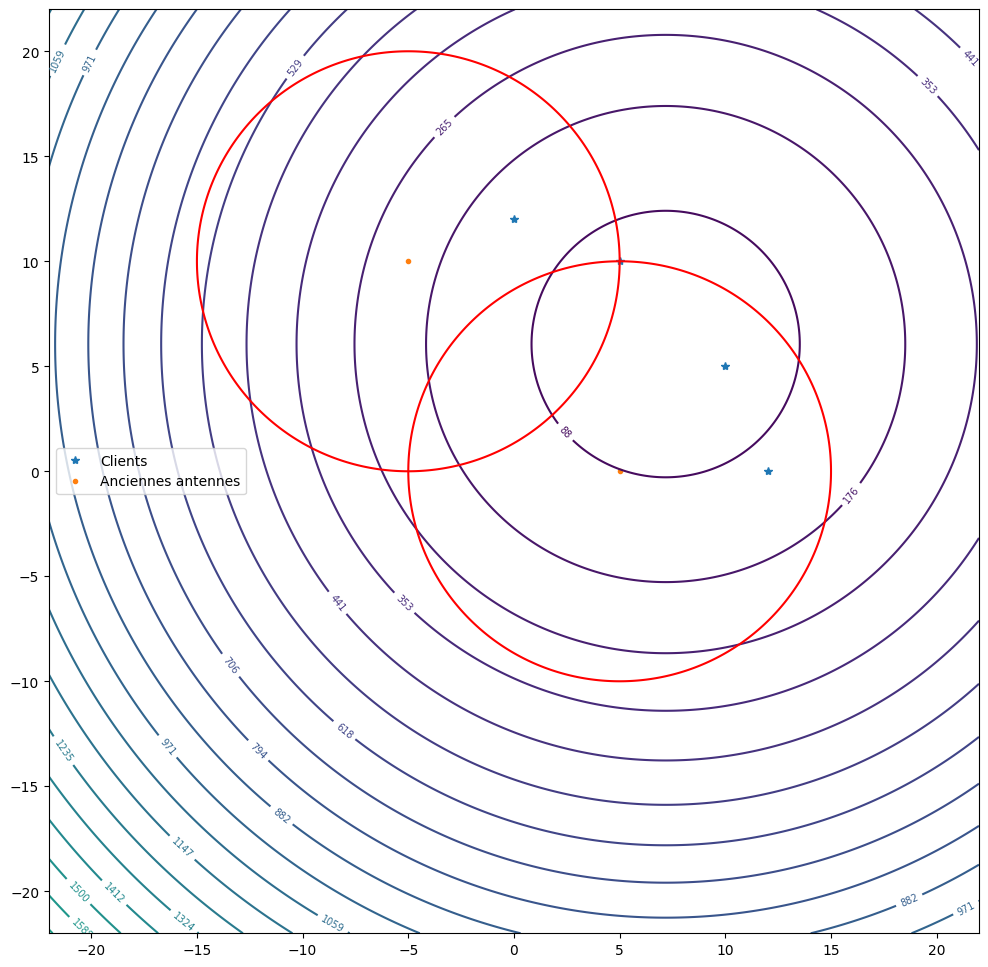

In [5]:
display()
plt.legend()

# Résolution par la fonction minimize (BFGS et SLSQP)

Utiliser  l’algorithme  BFGS pour  minimiser  la  fonction-objectif  $f$ sur $\mathbb{R}^2$ (c'est-à-dire sans prendre en compte les contraintes). Indication : consultez
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 

Position  antenne (sans contraintes) : [7.17647066 6.05882353]


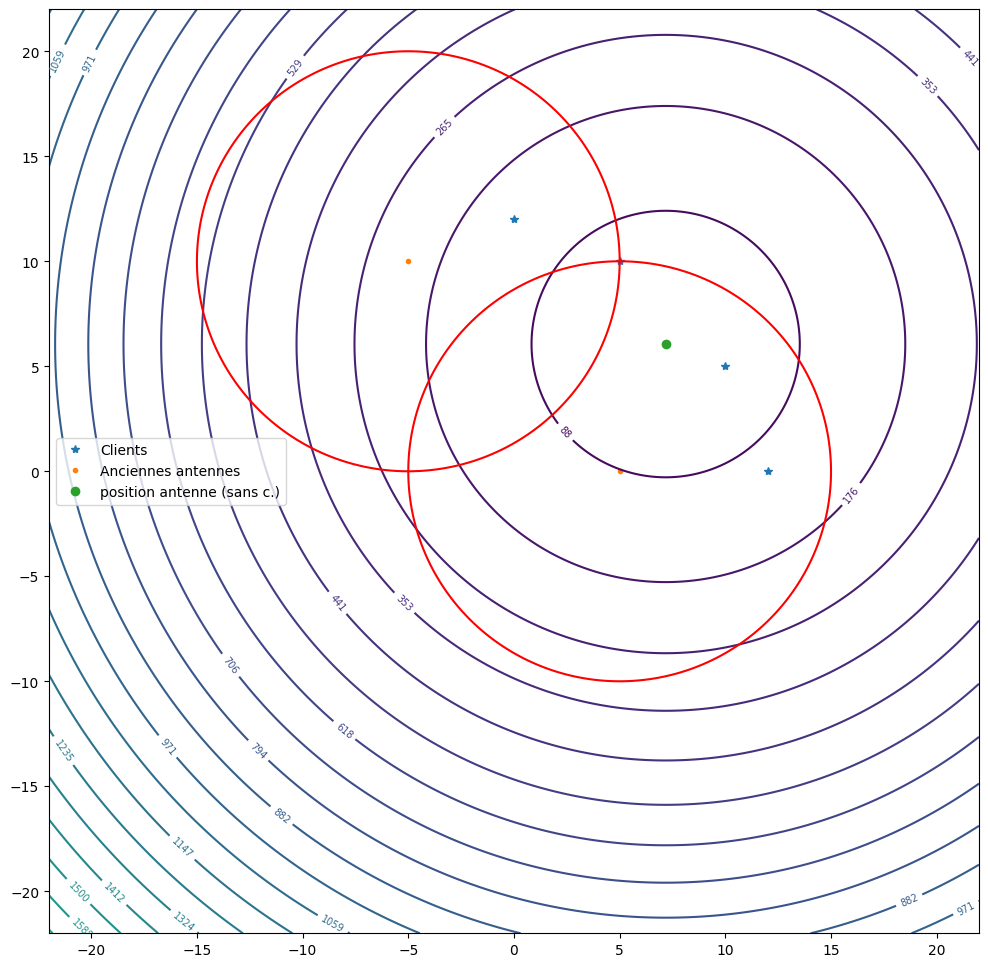

In [6]:
### Minimisation sans contrainte  ########## 
x0=np.array([0,0])
res= minimize(fobj, x0, method='BFGS')
sol_sansc = res.x
print('Position  antenne (sans contraintes) : '+str(sol_sansc))
display()
plt.plot(sol_sansc[0],sol_sansc[1],'o', label ='position antenne (sans c.)')
plt.legend()

Choisir comme point du depart $x_0= (-16,-20)$ et utiliser la méthode SLSQP pour résoudre le problème avec contraintes (complétez l'appel à la fonction minimize).
Indication : consultez
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 

Vérifier graphiquement et algébriquement ("sous python") que les conditions de KKT sont bien satisfaites.  Calculer les multiplicateurs de Lagrange

Position   antenne (sous contraintes) : [-5.00000000e+00 -2.39985771e-10]


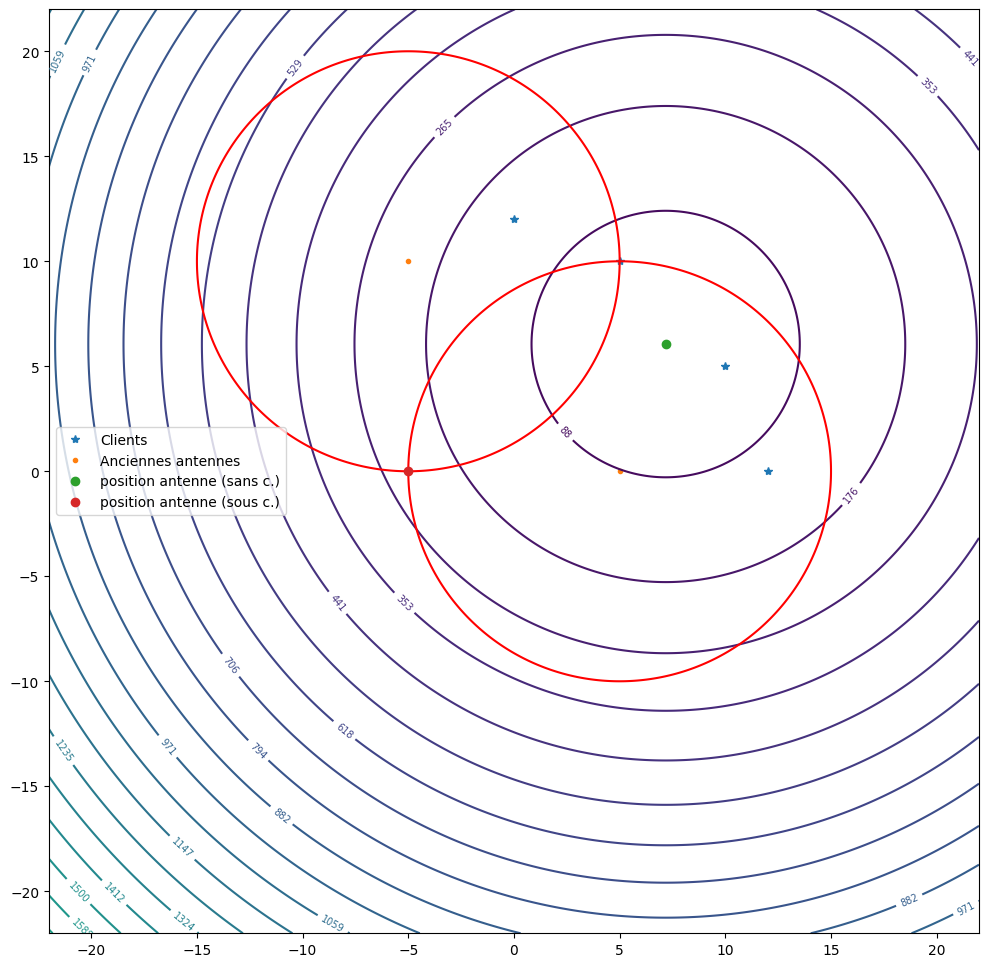

In [11]:

#### Minimisation sous contraintes ########## 
x0=np.array([-16,-20])
#x0=np.array([1,10])

def G(x):
    return np.array([-g(x,i) for i in range(0,len(ax))])

res= minimize(fobj,x0,method='SLSQP',  constraints={'type':'ineq', 'fun':G, 'jac': lambda x: np.array([-gradG(x,i) for i in range(0,len(ax))])})
sol_sousc = res.x


print('Position   antenne (sous contraintes) : '+str(sol_sousc))
display()
plt.plot(sol_sansc[0],sol_sansc[1],'o', label ='position antenne (sans c.)')
plt.plot(sol_sousc[0],sol_sousc[1],'o', label ='position antenne (sous c.)')
plt.legend()

In [12]:
#### Calcul des multiplicateurs ########## 
mu = -np.linalg.solve(np.array([gradG(sol_sousc,i) for i in range(0,len(ax))]).T, gradFobj(sol_sousc))
print('Multiplicateurs de Lagrange : '+str(mu))

Multiplicateurs de Lagrange : [1.21764706 0.60588235]


Reprendre la question précédente en partant du point $x_0=(1,10).$

Commenter  les  résultats  trouvés.   Ces  résultats  semblent  contredire  des  résultats  que  nous
avons demontré en cours (lesquels ?)

# Résolution par pénalisation 

Approchons maintenant le problème (1) par le problème sans contraintes suivant
\begin{equation}\tag{$P_r$}
\min_{x\in \mathbb{R}^2} f_r(x,y)= f(x)+r\displaystyle\sum_{i=1}^{nb_{antennes}} \max(g_i(x,y),0)^2
\end{equation}
où $r>0$ est une pénalité. En utilisant la méthode BFGS résoudre le problème ($P_r$) pour différents valeurs de $p \in\{0.001, 0.01, 0.1,1\}.$ Prendre comme point de départ $x_0=(0,0).$ Commentez le résultats.

Il s'agit de compléter les deux fonctions suivantes puis de faire appel à la méthode BFGS de minimize

In [13]:
# 
def fr(x,r):
    return fobj(x)+ r*np.sum([max(0,g(x,i))**2 for i in range(len(antennes))])

def gradfr(x,r):
    return gradFobj(x) + 2*r*np.sum([max(0,g(x,i))*gradG(x,i) for i in range(len(antennes))])

[7.41318927 6.71781109]


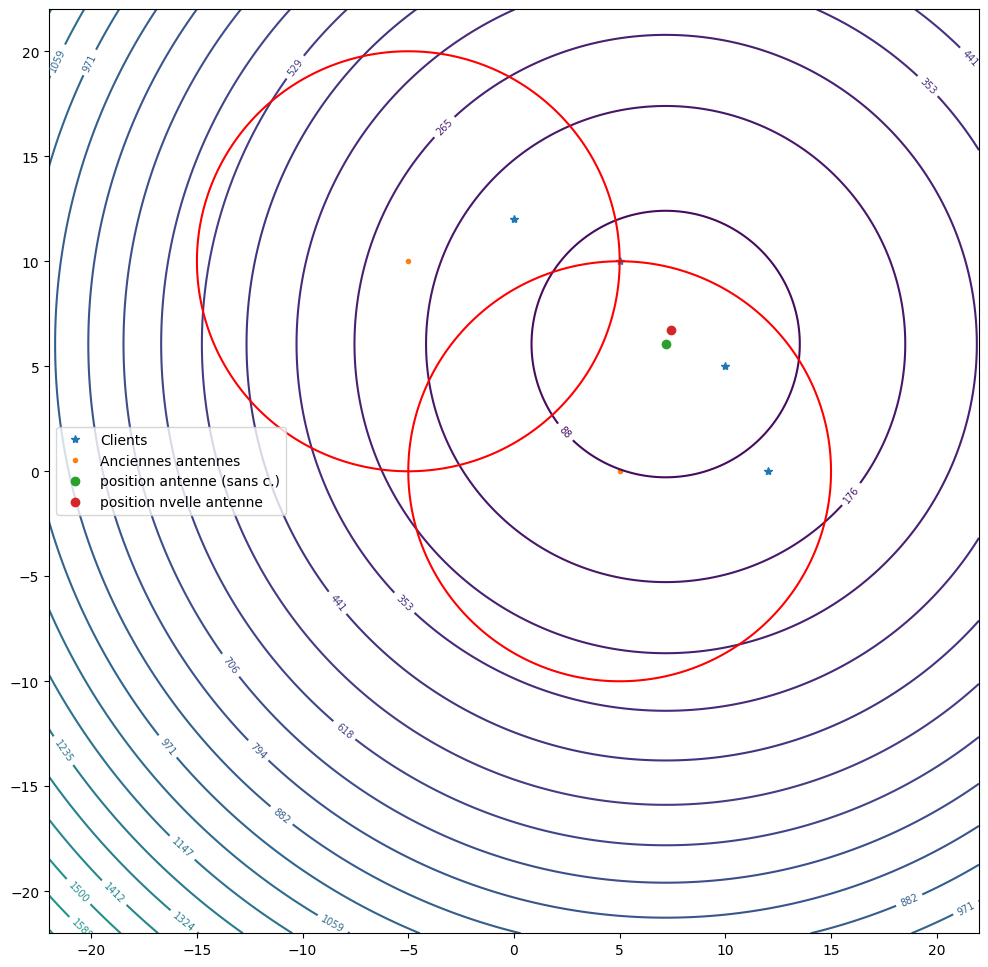

In [14]:
r =0.001
x0=np.array([0,0])
res= minimize(fr,x0,args=r,method='BFGS')
print(res.x)

display()
plt.plot(sol_sansc[0],sol_sansc[1],'o', label ='position antenne (sans c.)')
plt.plot(res.x[0],res.x[1],'o', label ='position nvelle antenne')
plt.legend()

# Résolution par l'algorithme du gradient projeté

On suppose  maintenant que l'entreprise a réussi à obtenir une dérogation  lui permettant d'installer la nouvelle antenne proche de son siège, plus précisément dans la zone   $||(x,y)||_{\infty}\leq d$, où $d>0$. Pour rappel $||(x,y)||_{\infty}=\max(|x|,|y|)$. L'entreprise cherche donc à résoudre le nouveau problème 

\begin{array}{lll}\tag{$P'$}
\min         & f(x,y):=\frac{1}{\sum_{i =1}^{nb_{clients}} h^c_i}   \displaystyle\sum_{i =1}^{nb_{clients}} h^c_i  \left((x-x^c_i)^2+(y-y^c_i)^2 \right)&\\
{s.c.}  &  (x,y) \in K:=\{(x,y)\in \mathbb{R}^2 \quad t.q.\qquad||(x,y)||_{\infty}\leq d\}  &\\\ 
\end{array}  

Jusifier le fait que $(P')$ possède un unique minimiseur local qui est aussi global.

Résoudre ce problème en utilisant SLSQP pour $d=6.5$. Utiliser $x_0=(0,0)$ comme point de départ. 

In [15]:
d=6.5
x0=np.array([0,0])

cons = ({'type': 'ineq', 'fun': lambda x: d - np.max(np.abs(x))})

res=  minimize(fobj, x0, method='SLSQP', constraints=cons)

print(res.x)

[6.5        6.05882385]


La forme de $K$ étant simple on peut utiliser l'algorithme de gradient projeté pour le résoudre. Il est en effet facile de définir $proj_K(x,y)$ qui à un point $(x,y)\in {R}^2$ associe sa projection orthogonale sur $K$ (définie par $ {proj}_K(x,y)= \min_{(a,b)\in K} ||(x-a,y-b)||_2$).

Complétez la fonction python suivante. 

In [16]:
def projK(x):
    return np.array([min(d, max(-d, xi)) for xi in x])



Complétez l'algorithme de gradient projeté suivant. On utilisera la stratégie de pas constant pour la recherche du pas.  Comme critère d'arrêt utiliser nombre maximal d'itération ou $\|x_{k+1}-x_k\|\leq \varepsilon$

In [20]:
def algoGradientProj(f,gradf,x0, pas, epsilon, nIterMax):
    ''' Algo de GRADIENT PROJETE
    - f                   une fonction : R^2 -> R
    - gradf               la fonction gradient  : R^2 -> R^2
    - x0                  point de depart : np.array : R^2
    - pas                 la valeur du pas   constant
    - espsilon, nIterMax  pour les criteres d'arrets
     Sorties :  
    -xk  :            vecteur solution optimal
    -X =[x0,....xk] :  liste qui contient les iteres xk
    '''
    k=0
    xk=x0
    X=[xk]  # stocke les iteres xk
    gradk=gradf(xk)
    encore = True
    while(encore & (k<nIterMax)):
        #Calculer la direction
        dk = -gradk  
        #calculer le pas 
        pk= pas
        #calculer le prochain itere
        k=k+1
        xk = projK(xk + pk*dk)
        X.append(xk)
        gradk = gradf(xk)
        if(np.linalg.norm(X[-2]-xk)<epsilon):
            encore =False
        #        
    return xk, X

Appliquer l'algorithme de gradient projeté pour résoudre $P'$.  Vérifiez en utilisant KKT qu'il s'agit bien de la solution optimale.

In [21]:
x0= np.array([0,0])
pas = 0.01
epsilon = 1e-7
nIterMax= 4000

xk, X= algoGradientProj(fobj, gradFobj, x0, pas, epsilon, nIterMax)

print(xk)
print(gradFobj(xk))

[6.5        6.05881869]
[-1.35294118e+00 -9.67254827e-06]


In [22]:
def displayBis():
    #affichage du nouveau probleme
    plt.figure(figsize = (12,12))
    ''' Affichage des clients, des antennes, des contraintes et     des lignes de niveaux de la fonction objective'''
    plt.plot(cx,cy, '*', label = 'Clients')
    plt.plot(ax,ay,'.', label = 'Anciennes antennes')
    x, y = np.meshgrid(np.linspace(-22,22,401), np.linspace(-22,22,401))
    #ligne de niveau de la fct-obj
    z = fobj([x,y])
    level = np.linspace(0, 3000, 35)
    #level = np.concatenate((level, np.array([ self.objfun(sol_sousc)])),
    #                       axis =1)
    lignes_niv = plt.contour(x,y,z,level)
    plt.clabel(lignes_niv, inline=1, fontsize=7)
        
     #ligne g_i(x)=0 : limite des contraintes
     #pour tracer la frontiere de K
    ls = np.linspace(-d, d,3)
    plt.plot(ls-ls+d,ls,color='red')
    plt.plot(ls-ls-d,ls,color='red')
    plt.plot(ls,ls-ls+d,color='red')
    plt.plot(ls,ls-ls-d,color='red')


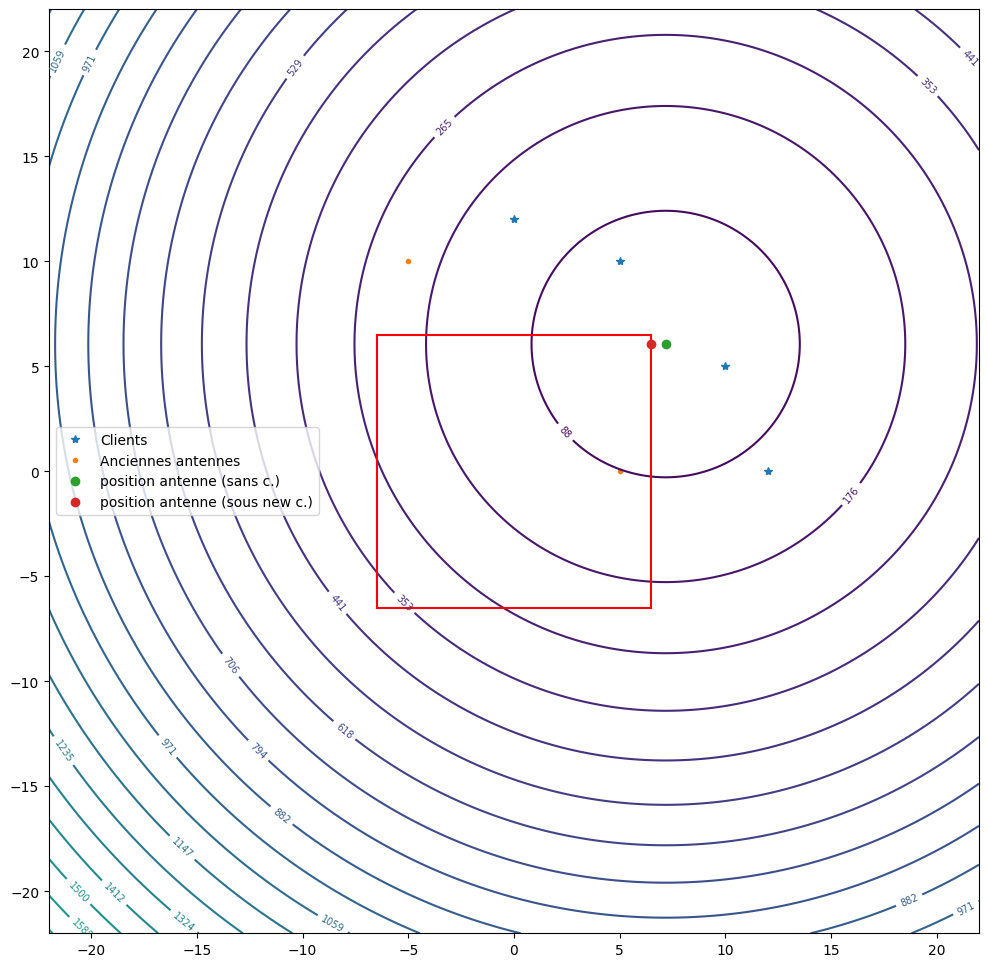

In [23]:
displayBis()

plt.plot(sol_sansc[0],sol_sansc[1],'o', label ='position antenne (sans c.)')
#plt.plot(res.x[0],res.x[1],'o', label ='new')
plt.plot(xk[0],xk[1],'o', label = 'position antenne (sous new c.)')

plt.legend()